# Steadystate of the Bloch-Redfield Master Equation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from qutip import *
from IPython.display import display

## Compare steadystate of brmesolve and mesolve

In [15]:
def solve(H, psi0, c_ops, a_ops, e_ops):
    
    result_me = mesolve(H, psi0, times, c_ops, e_ops)
    result_brme = brmesolve(H, psi0, times, a_ops, e_ops)
    
    fig, ax = plot_expectation_values([result_me, result_brme])
    display(fig)
    plt.close(fig)
    
    R, ekets = bloch_redfield_tensor(H, a_ops)
    print("="* 20 + " Bloch-Redfield tensor: ")
    display(R)
    
    
    L = liouvillian(H, c_ops)
    print("="* 20 + " Lindblad liouvilllian: ")
    display(L)
    
    print("="* 20 + " Bloch-Redfield steadystate dm")
    R_rhoss_eb = steadystate(R)
    R_rhoss = R_rhoss_eb.transform(ekets, True)
    display(R_rhoss)
    
    print("="* 20 + " Lindblad steadystate dm")
    L_rhoss = steadystate(L)
    display(L_rhoss)

    print("="* 20 + " Steadystate expectation values")
    print("R_ob: ", [expect(e, R_rhoss) for e in e_ops])
    print("R_eb: ", [expect(e.transform(ekets), R_rhoss_eb) for e in e_ops])
    print("L   : ", [expect(e, L_rhoss) for e in e_ops])

    print("="* 20 + " Dynamics final states")

    print("R: ", [e[-1].real for e in result_brme.expect])
    print("L: ", [e[-1] for e in result_me.expect])

## Two-level system

In [16]:
delta = 0.0 * 2 * np.pi
epsilon = 0.5 * 2 * np.pi
gamma = 0.25
times = np.linspace(0, 50, 100)

In [17]:
H = delta/2 * sigmay() + epsilon/2 * sigmaz()
psi0 = (2 * basis(2, 0) + basis(2, 1)).unit()
c_ops = [np.sqrt(gamma) * sigmam()]
a_ops = [[sigmax(),lambda w : gamma * (w >= 0)]]
e_ops = [sigmax(), sigmay(), sigmaz()]

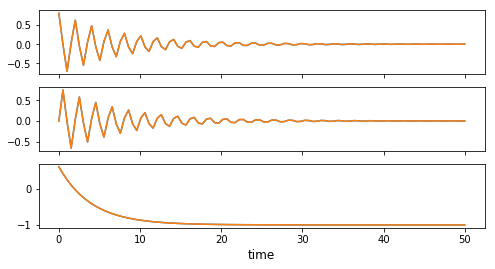

==================== Bloch-Redfield tensor: 


Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.000+0.j          0.000+0.j          0.000+0.j          0.250+0.j        ]
 [ 0.000+0.j         -0.125-3.14159265j  0.000+0.j          0.000+0.j        ]
 [ 0.000+0.j          0.000+0.j         -0.125+3.14159265j  0.000+0.j        ]
 [ 0.000+0.j          0.000+0.j          0.000+0.j         -0.250+0.j        ]]

==================== Lindblad liouvilllian: 


Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[-0.250+0.j          0.000+0.j          0.000+0.j          0.000+0.j        ]
 [ 0.000+0.j         -0.125+3.14159265j  0.000+0.j          0.000+0.j        ]
 [ 0.000+0.j          0.000+0.j         -0.125-3.14159265j  0.000+0.j        ]
 [ 0.250+0.j          0.000+0.j          0.000+0.j          0.000+0.j        ]]

==================== Bloch-Redfield steadystate dm


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]]

==================== Lindblad steadystate dm


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]]

==================== Steadystate expectation values
R_ob:  [0.0, 0.0, -1.0]
R_eb:  [0.0, 0.0, -1.0]
L   :  [0.0, 0.0, -1.0]
==================== Dynamics final states
R:  [0.0015427968283087687, 2.506068854864511e-07, -0.999994037354897]
L:  [0.001542796828343541, 2.5060686974779289e-07, -0.99999403735489634]


In [18]:
solve(H, psi0, c_ops, a_ops, e_ops)

## Harmonic oscillator

In [25]:
N = 10

w0 = 1.0 * 2 * np.pi
g = 0.05 * w0
kappa = 0.15

times = np.linspace(0, 50, 1000)

In [26]:
a = destroy(N)
H = w0 * a.dag() * a + g * (a + a.dag())
psi0 = ket2dm((basis(N, 4) + basis(N, 2) + basis(N,0)).unit())
a_ops = [[a + a.dag(),lambda w : kappa * (w >= 0)]]
e_ops = [a.dag() * a, a + a.dag()]

### Zero temperature

In [27]:
c_ops = [np.sqrt(kappa) * a]

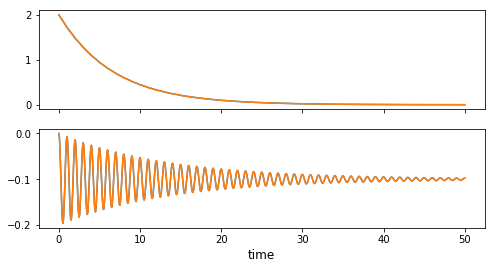

==================== Bloch-Redfield tensor: 


Quantum object: dims = [[[10], [10]], [[10], [10]]], shape = (100, 100), type = super, isherm = False
Qobj data =
[[  0.00000000e+00 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,   0.00000000e+00 +0.j           0.00000000e+00 +0.j
    1.92616723e-25 +0.j        ]
 [  0.00000000e+00 +0.j          -7.50000000e-02 -6.28318531j
    0.00000000e+00 +0.j         ...,   0.00000000e+00 +0.j
    0.00000000e+00 +0.j           0.00000000e+00 +0.j        ]
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j
   -1.50000000e-01-12.56637061j ...,   0.00000000e+00 +0.j
    0.00000000e+00 +0.j           0.00000000e+00 +0.j        ]
 ..., 
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,  -1.23986225e+00+12.72172562j   0.00000000e+00 +0.j
    0.00000000e+00 +0.j        ]
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,   0.00000000e+00 +0.j          -1.31151418e+00 +6.43683307j
    0.00000000e+

==================== Lindblad liouvilllian: 


Quantum object: dims = [[[10], [10]], [[10], [10]]], shape = (100, 100), type = super, isherm = False
Qobj data =
[[ 0.000 +0.j          0.000 -0.31415927j  0.000 +0.j         ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 -0.31415927j -0.075 -6.28318531j  0.000 -0.44428829j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 +0.j          0.000 -0.44428829j -0.150-12.56637061j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 ..., 
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
  -1.200+12.56637061j  0.000 -0.88857659j  0.000 +0.j        ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 -0.88857659j -1.275 +6.28318531j  0.000 -0.9424778j ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 +0.j          0.000 -0.9424778j  -1.350 +0.j        ]]

==================== Bloch-Redfield steadystate dm


Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[  9.97503122e-01  -4.98751561e-02   1.76335306e-03  -5.09036181e-05
    1.27259045e-06  -2.84559877e-08   5.80853629e-10  -1.09769055e-11
    0.00000000e+00   0.00000000e+00]
 [ -4.98751561e-02   2.49375781e-03  -8.81676528e-05   2.54518090e-06
   -6.36295226e-08   1.42279939e-09  -2.90426815e-11   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.76335306e-03  -8.81676528e-05   3.11719726e-06  -8.99857338e-08
    2.24964334e-09  -5.03035547e-11   1.02681385e-12   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.09036181e-05   2.54518090e-06  -8.99857338e-08   2.59766438e-09
   -6.49416095e-11   1.45213854e-12   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.27259045e-06  -6.36295226e-08   2.24964334e-09  -6.49416095e-11
    1.62354024e-12   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.84559877e-08   

==================== Lindblad steadystate dm


Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[  9.97503478e-01 +0.00000000e+00j  -4.98680685e-02 +5.95256221e-04j
    1.76260012e-03 -4.20849746e-05j  -5.08601343e-05 +1.82198671e-06j
    1.27077858e-06 -6.07184696e-08j  -2.83952207e-08 +1.69664924e-09j
    5.79119104e-10 -4.15454326e-11j  -1.09333927e-11 +9.15642639e-13j
    1.93056167e-13 -1.84908648e-14j  -3.21257403e-15 +3.46442788e-16j]
 [ -4.98680685e-02 -5.95256221e-04j   2.49340343e-03 +0.00000000e+00j
   -8.81425648e-05 +1.05212437e-06j   2.54373169e-06 -6.07357748e-08j
   -6.35661108e-08 +2.27715893e-09j   1.42057124e-09 -6.78756417e-11j
   -2.89766221e-11 +1.73138868e-12j   5.47138159e-13 -3.92511512e-14j
   -9.66246754e-15 +8.09206030e-16j   1.60812556e-16 -1.54025809e-17j]
 [  1.76260012e-03 +4.20849746e-05j  -8.81425648e-05 -1.05212437e-06j
    3.11631026e-06 +0.00000000e+00j  -8.99473125e-08 +1.07366696e-09j
    2.24804211e-09 -5.36757000e-11j  -5.02462638e-11 +1.79999574

==================== Steadystate expectation values
R_ob:  [0.0024999999999958857, -0.09999999999983651]
R_eb:  [0.0024999999999999467, -0.09999999999999895]
L   :  [0.0024996438434595246, -0.09998575373839921]
==================== Dynamics final states
R:  [0.0034899627568894909, -0.097648226112852135]
L:  [0.0034896231351718215, -0.097634314487055257]


In [28]:
solve(H, psi0, c_ops, a_ops, e_ops)

### Finite temperature

In [29]:
n_th = 1.5
c_ops = [np.sqrt(kappa * (n_th + 1)) * a, np.sqrt(kappa * n_th) * a.dag()]
w_th = w0/np.log(1 + 1/n_th)

def S_w_func(w):
    if w >= 0:
        return (n_th + 1) * kappa
    else:
        return (n_th + 1) * kappa * np.exp(w / w_th)
    
a_ops = [[a + a.dag(), S_w_func]]

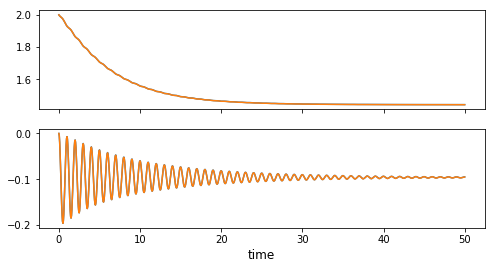

==================== Bloch-Redfield tensor: 


Quantum object: dims = [[[10], [10]], [[10], [10]]], shape = (100, 100), type = super, isherm = False
Qobj data =
[[ -2.25000000e-01 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,   0.00000000e+00 +0.j           0.00000000e+00 +0.j
    4.81541807e-25 +0.j        ]
 [  0.00000000e+00 +0.j          -5.25000000e-01 -6.28318531j
    0.00000000e+00 +0.j         ...,   0.00000000e+00 +0.j
    0.00000000e+00 +0.j           0.00000000e+00 +0.j        ]
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j
   -8.25000000e-01-12.56637061j ...,   0.00000000e+00 +0.j
    0.00000000e+00 +0.j           0.00000000e+00 +0.j        ]
 ..., 
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,  -3.99916053e+00+12.72172562j   0.00000000e+00 +0.j
    0.00000000e+00 +0.j        ]
 [  0.00000000e+00 +0.j           0.00000000e+00 +0.j           0.00000000e+00 +0.j
  ...,   0.00000000e+00 +0.j          -4.23143288e+00 +6.43683307j
    0.00000000e+

==================== Lindblad liouvilllian: 


Quantum object: dims = [[[10], [10]], [[10], [10]]], shape = (100, 100), type = super, isherm = False
Qobj data =
[[-0.225 +0.j          0.000 -0.31415927j  0.000 +0.j         ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 -0.31415927j -0.525 -6.28318531j  0.000 -0.44428829j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 +0.j          0.000 -0.44428829j -0.825-12.56637061j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 ..., 
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
  -3.900+12.56637061j  0.000 -0.88857659j  0.000 +0.j        ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 -0.88857659j -4.200 +6.28318531j  0.000 -0.9424778j ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 +0.j          0.000 -0.9424778j  -3.375 +0.j        ]]

==================== Bloch-Redfield steadystate dm


Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[  4.02051975e-01  -8.04103950e-03   1.13717471e-04  -1.31309625e-06
    1.31309625e-08  -1.17446957e-10   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -8.04103950e-03   2.41392006e-01  -6.82532262e-03   1.18204925e-04
   -1.57597812e-06   1.76193838e-08  -1.72630262e-10   1.52100275e-12
    0.00000000e+00   0.00000000e+00]
 [  1.13717471e-04  -6.82532262e-03   1.44931728e-01  -5.01723899e-03
    1.00322492e-04  -1.49535330e-06   1.83130421e-08  -1.93798310e-10
    1.82687728e-12   0.00000000e+00]
 [ -1.31309625e-06   1.18204925e-04  -5.01723899e-03   8.70169709e-02
   -3.47720356e-03   7.77267351e-05  -1.26906081e-06   1.67864181e-08
   -1.89903973e-10   1.89889807e-12]
 [  1.31309625e-08  -1.57597812e-06   1.00322492e-04  -3.47720356e-03
    5.22449546e-02  -2.33335633e-03   5.71299428e-05  -1.00745365e-06
    1.42456470e-08  -1.70914413e-10]
 [ -1.17446957e-10   

==================== Lindblad steadystate dm


Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[  4.02029887e-01 +0.00000000e+00j  -8.03945243e-03 +9.59634656e-05j
    1.13662383e-04 -2.71378066e-06j  -1.31187151e-06 +4.70539718e-08j
    1.31186656e-08 -6.31877686e-10j  -1.17849817e-10 +6.49255768e-12j
    9.42303550e-13 -1.32186907e-14j  -4.29432831e-15 -4.68339168e-16j
   -7.47398192e-17 -6.56792895e-17j   1.60514096e-18 +4.17525690e-18j]
 [ -8.03945243e-03 -9.59634656e-05j   2.41378721e-01 +0.00000000e+00j
   -6.82398017e-03 +8.14565544e-05j   1.18148666e-04 -2.81847808e-06j
   -1.57404145e-06 +5.62120774e-08j   1.75584150e-08 -8.97039669e-10j
   -1.75710537e-10 +1.45389688e-11j   1.85263873e-12 -5.98104959e-14j
   -2.15323378e-14 -1.25913674e-14j   4.07834561e-17 +5.63705154e-16j]
 [  1.13662383e-04 +2.71378066e-06j  -6.82398017e-03 -8.14565544e-05j
    1.44923740e-01 +0.00000000e+00j  -5.01624370e-03 +5.99144006e-05j
    1.00289712e-04 -2.39557300e-06j  -1.49454743e-06 +5.06886177

==================== Steadystate expectation values
R_ob:  [1.441172521173384, -0.09593514655834637]
R_eb:  [1.4411725211733848, -0.0959351465583464]
L   :  [1.4415837865925414, -0.09581420257265144]
==================== Dynamics final states
R:  [1.4412697964611352, -0.094946706436505962]
L:  [1.4416807381001973, -0.094807209086397559]


In [30]:
solve(H, psi0, c_ops, a_ops, e_ops)

## Atom-Cavity

In [34]:
N = 10
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))
psi0 = ket2dm(tensor(basis(N, 1), basis(2, 0)))
a_ops = [[a + a.dag(),lambda w : kappa*(w > 0)]]
e_ops = [a.dag() * a, sm.dag() * sm]

### Weak coupling

In [35]:
w0 = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.05
times = np.linspace(0, 150 * 2 * np.pi / g, 1000)
c_ops = [np.sqrt(kappa) * a]
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (a + a.dag()) * (sm + sm.dag())

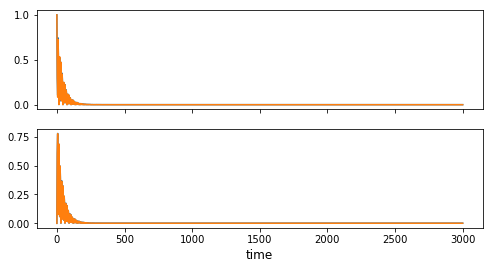

==================== Bloch-Redfield tensor: 


Quantum object: dims = [[[10, 2], [10, 2]], [[10, 2], [10, 2]]], shape = (400, 400), type = super, isherm = False
Qobj data =
[[ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j         ...,
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j         -0.01348632-5.96911979j  0.00000000+0.j         ...,
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j         -0.01160761-6.59724095j
  ...,  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j        ]
 ..., 
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j         ...,
  -0.44114336+7.26287912j  0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j         ...,
   0.00000000+0.j         -0.43647128+5.38162336j  0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j         ...,
   0.00000000+0.j 

==================== Lindblad liouvilllian: 


Quantum object: dims = [[[10, 2], [10, 2]], [[10, 2], [10, 2]]], shape = (400, 400), type = super, isherm = False
Qobj data =
[[ 0.000+0.j          0.000+0.j          0.000+0.j         ...,  0.000+0.j
   0.000+0.j          0.000+0.j        ]
 [ 0.000+0.j          0.000-6.28318531j  0.000-0.31415927j ...,  0.000+0.j
   0.000+0.j          0.000+0.j        ]
 [ 0.000+0.j          0.000-0.31415927j -0.025-6.28318531j ...,  0.000+0.j
   0.000+0.j          0.000+0.j        ]
 ..., 
 [ 0.000+0.j          0.000+0.j          0.000+0.j         ...,
  -0.425+6.28318531j  0.000-0.9424778j   0.000+0.j        ]
 [ 0.000+0.j          0.000+0.j          0.000+0.j         ...,
   0.000-0.9424778j  -0.450+6.28318531j  0.000+0.j        ]
 [ 0.000+0.j          0.000+0.j          0.000+0.j         ...,  0.000+0.j
   0.000+0.j         -0.450+0.j        ]]

==================== Bloch-Redfield steadystate dm


Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[  9.99373827e-01   0.00000000e+00   0.00000000e+00  -2.49999707e-02
    8.84158652e-04   0.00000000e+00   0.00000000e+00  -1.91485790e-05
    4.78814187e-07   0.00000000e+00   0.00000000e+00  -8.92403421e-09
    1.82189287e-10   0.00000000e+00   0.00000000e+00  -3.01314674e-12
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.0

==================== Lindblad steadystate dm


Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[  9.98120425e-01 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -2.49685135e-02 +4.97352698e-05j
    8.83024879e-04 -5.27010997e-06j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -1.91235099e-05 +1.71178575e-07j
    4.78162691e-07 -6.18105497e-09j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -8.91141216e-09 +1.44721909e-10j
    1.81917269e-10 -3.67755077e-12j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -3.00839702e-12 +7.12827202e-14j
    5.31822729e-14 -1.47158804e-15j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -7.97545642e-16 +2.49256213e-17j]
 [  0.00000000e+00 +0.00000000e+00j   6.28152194e-04 +0.00000000e+00j
   -3.12778095e-05 +4.97148485e-05j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   5.46429986e-07 -1.757

==================== Steadystate expectation values
R_ob:  [0.0006269556884685608, 0.0006253905020122077]
R_eb:  [0.0006269556893783309, 0.0006253905020103645]
L   :  [0.0012531197519054338, 0.0012536697716992462]
==================== Dynamics final states
R:  [0.00062695568938809241, 0.00062539050201271512]
L:  [0.0012531197519057469, 0.0012536697716989808]


In [36]:
solve(H, psi0, c_ops, a_ops, e_ops)

### Strong coupling

In [37]:
w0 = 1.0 * 2 * np.pi
g = 0.75 * 2 * np.pi
kappa = 0.05
times = np.linspace(0, 150 * 2 * np.pi / g, 1000)

In [38]:
c_ops = [np.sqrt(kappa) * a]
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (a + a.dag()) * (sm + sm.dag())

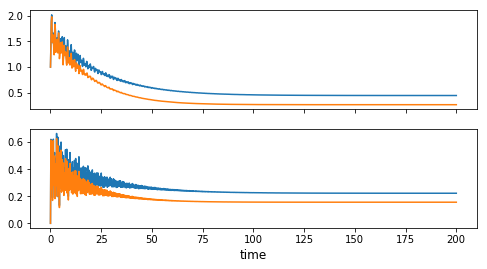

==================== Bloch-Redfield tensor: 


Quantum object: dims = [[[10, 2], [10, 2]], [[10, 2], [10, 2]]], shape = (400, 400), type = super, isherm = False
Qobj data =
[[ 0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j         ...,
   0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j        ]
 [ 0.00000000 +0.j         -0.05067391 -1.88466252j  0.00000000 +0.j         ...,
   0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j        ]
 [ 0.00000000 +0.j          0.00000000 +0.j         -0.05172134 -6.70461497j
  ...,  0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j        ]
 ..., 
 [ 0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j         ...,
  -0.68122977+14.14935361j  0.00000000 +0.j          0.00000000 +0.j        ]
 [ 0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.j         ...,
   0.00000000 +0.j         -0.51432716 +0.51299852j  0.00000000 +0.j        ]
 [ 0.00000000 +0.j          0.00000000 +0.j          0.00000000 +0.

==================== Lindblad liouvilllian: 


Quantum object: dims = [[[10, 2], [10, 2]], [[10, 2], [10, 2]]], shape = (400, 400), type = super, isherm = False
Qobj data =
[[ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 +0.j          0.000 -6.28318531j  0.000 -4.71238898j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 [ 0.000 +0.j          0.000 -4.71238898j -0.025 -6.28318531j ...,
   0.000 +0.j          0.000 +0.j          0.000 +0.j        ]
 ..., 
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
  -0.425 +6.28318531j  0.000-14.13716694j  0.000 +0.j        ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000-14.13716694j -0.450 +6.28318531j  0.000 +0.j        ]
 [ 0.000 +0.j          0.000 +0.j          0.000 +0.j         ...,
   0.000 +0.j          0.000 +0.j         -0.450 +0.j        ]]

==================== Bloch-Redfield steadystate dm


Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[  7.95021691e-01   0.00000000e+00   0.00000000e+00  -3.45496723e-01
    1.95477701e-01   0.00000000e+00   0.00000000e+00  -6.79064848e-02
    2.65505422e-02   0.00000000e+00   0.00000000e+00  -7.74937530e-03
    2.44698782e-03   0.00000000e+00   0.00000000e+00  -6.26395795e-04
    1.69581885e-04   0.00000000e+00   0.00000000e+00  -3.69515569e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.0

==================== Lindblad steadystate dm


Quantum object: dims = [[10, 2], [10, 2]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[  5.95464357e-01 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -2.56335597e-01 +6.82349752e-04j
    1.42881636e-01 -9.39604405e-04j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -4.90719593e-02 +4.79253918e-04j
    1.89137499e-02 -2.60248108e-04j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -5.45196704e-03 +9.40858646e-05j
    1.69510288e-03 -3.62277167e-05j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -4.27510005e-04 +1.07283714e-05j
    1.13614630e-04 -3.32830054e-06j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j  -2.43530912e-05 +8.04586637e-07j]
 [  0.00000000e+00 +0.00000000e+00j   7.25263674e-02 +0.00000000e+00j
   -9.18818845e-02 +6.04619956e-04j   0.00000000e+00 +0.00000000e+00j
    0.00000000e+00 +0.00000000e+00j   3.96636051e-02 -3.607

==================== Steadystate expectation values
R_ob:  [0.267645307720865, 0.1560205514129042]
R_eb:  [0.267645307720865, 0.1560205514129042]
L   :  [0.4465560981540205, 0.22225842348795147]
==================== Dynamics final states
R:  [0.26764721566971927, 0.15602106817515593]
L:  [0.44662603050034932, 0.22228388401493518]


In [39]:
solve(H, psi0, c_ops, a_ops, e_ops)

## Versions

In [40]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
